<a href="https://colab.research.google.com/github/SampadaPandit/sports-analytics/blob/master/AFL_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/
df = pd.read_csv("playerdata.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
df.head(5)

,Unnamed: 0,playerId,gamesPlayed,playerDetails.givenName,playerDetails.surname,playerDetails.age,playerDetails.heightCm,playerDetails.weightKg,playerDetails.jumperNumber,playerDetails.kickingFoot,...,averages.scoreLaunches,averages.shotsAtGoal,averages.spoils,averages.stoppageClearances,averages.tackles,averages.tacklesInside50,averages.totalClearances,averages.totalPossessions,averages.turnovers,averages.uncontestedPossessions
0,0,CD_I1000044,0.0,Jez,McLennan,21,185,85,43,RIGHT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,CD_I1000061,7.0,Callum,Coleman-Jones,23,200,105,21,RIGHT,...,1.3,1.1,1.1,0.4,1.7,0.1,1.4,11.1,2.9,5.1
2,2,CD_I1000068,2.0,Chris,Burgess,26,191,94,29,RIGHT,...,0.0,0.5,4.5,0.0,1.0,1.0,0.0,5.5,1.0,1.5
3,3,CD_I1000072,17.0,John,Noble,25,180,75,9,RIGHT,...,1.1,0.1,1.1,0.4,2.4,0.1,0.5,17.8,3.2,13.4
4,4,CD_I1000223,18.0,Liam,Baker,24,173,72,7,RIGHT,...,1.3,1.2,0.7,1.2,2.6,0.5,1.6,18.6,3.5,11.6


In [ ]:
df_table = df[['totals.matchesPlayed','totals.goals','totals.effectiveKicks','totals.intercepts','team.teamName']]
df_table.groupby(['team.teamName']).sum()

,totals.matchesPlayed,totals.goals,totals.effectiveKicks,totals.intercepts
team.teamName,,,,
Adelaide Crows,414.0,199.0,2365.0,1245.0
Brisbane Lions,414.0,268.0,2729.0,1257.0
Carlton,414.0,228.0,2813.0,1256.0
Collingwood,391.0,210.0,2259.0,1291.0
Essendon,391.0,191.0,2533.0,1101.0
Fremantle,414.0,210.0,2690.0,1259.0
GWS Giants,414.0,200.0,2620.0,1203.0
Geelong Cats,414.0,242.0,2627.0,1270.0
Gold Coast Suns,414.0,222.0,2437.0,1282.0


In [ ]:
age_bins=[0,10,15,20,25,30,100]
age_labels=["0 to 10 years","10 to 15 years","15 to 20 years","20 to 25 years","25 to 30 years","30 & above"]

df["Age Category"] = pd.cut(df['playerDetails.age'],age_bins,labels=age_labels)

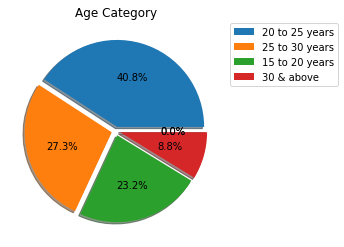

In [ ]:
pieplot = df["Age Category"].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05,0.05,0.05,0.05,0.05], legend=True, title='Age Category', ylabel='', labeldistance=None)
pieplot.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
df_avg_height_by_agegroup = df[['Age Category','playerDetails.heightCm']]
df_avg_height_by_agegroup1 = pd.DataFrame.from_dict(df_avg_height_by_agegroup.groupby(['Age Category']).mean()).reset_index()
h1 = df_avg_height_by_agegroup1['playerDetails.heightCm'].to_numpy()


In [ ]:
df_avg_weight_by_agegroup = df[['Age Category','playerDetails.weightKg']]
df_avg_weight_by_agegroup1 = pd.DataFrame.from_dict(df_avg_weight_by_agegroup.groupby(['Age Category']).mean()).reset_index()
w1 = df_avg_weight_by_agegroup1['playerDetails.weightKg'].to_numpy()

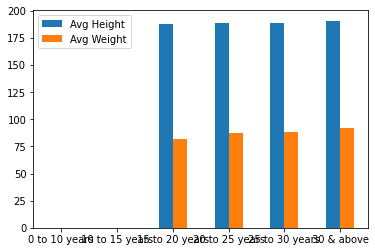

In [ ]:
df_bar = pd.DataFrame({'Avg Height': h1, 'Avg Weight': w1}, index = age_labels)
ax = df_bar.plot.bar(rot=0)

In [ ]:
gamesPlayed_bins=[0,5,10,15,20,100]
gamesPlayed_labels=["0 to 5 games","5 to 10 games","10 to 15 games","15 to 20 games","20 & above"]
df_sortby_gamesPlayed = df.sort_values(by='gamesPlayed',ascending=[False])

,Unnamed: 0,playerId,gamesPlayed,playerDetails.givenName,playerDetails.surname,playerDetails.age,playerDetails.heightCm,playerDetails.weightKg,playerDetails.jumperNumber,playerDetails.kickingFoot,...,averages.spoils,averages.stoppageClearances,averages.tackles,averages.tacklesInside50,averages.totalClearances,averages.totalPossessions,averages.turnovers,averages.uncontestedPossessions,Age Category,Games Played
810,810,CD_I999827,18.0,Zac,Fisher,24,179,76,25,LEFT,...,0.1,0.9,2.1,0.6,1.1,20.0,3.6,14.1,20 to 25 years,15 to 20 games
167,167,CD_I1008198,18.0,Tom,McCartin,22,193,97,30,RIGHT,...,7.7,0.2,1.6,0.0,0.2,10.2,1.4,5.2,20 to 25 years,15 to 20 games
500,500,CD_I290799,18.0,Tom,Liberatore,30,184,85,21,LEFT,...,0.3,4.5,4.8,0.6,7.1,25.7,3.6,12.5,25 to 30 years,15 to 20 games
503,503,CD_I290832,18.0,David,Swallow,29,185,87,24,RIGHT,...,0.4,2.5,3.1,0.7,3.9,19.4,4.1,10.4,25 to 30 years,15 to 20 games
785,785,CD_I998180,18.0,Bailey,Banfield,24,190,88,41,LEFT,...,0.2,0.1,1.4,1.0,0.1,8.4,1.9,4.9,20 to 25 years,15 to 20 games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,CD_I1017932,0.0,Jack,Peris,18,178,69,45,RIGHT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 to 20 years,0 to 5 games
378,378,CD_I1018016,0.0,Seamus,Mitchell,20,181,79,40,RIGHT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 to 20 years,0 to 5 games
380,380,CD_I1018020,0.0,Flynn,Kroeger,19,185,85,25,RIGHT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 to 20 years,0 to 5 games
382,382,CD_I1018296,0.0,Kalin,Lane,20,205,102,45,RIGHT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 to 20 years,0 to 5 games


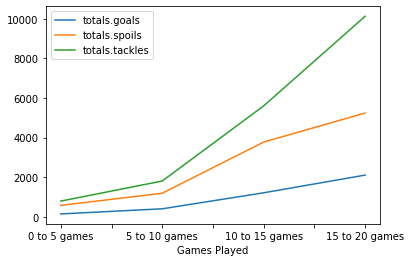

In [ ]:
df_sum_match_gamesPlayed = df_sortby_gamesPlayed[['Games Played','totals.goals','totals.spoils','totals.tackles']]
df_sum_match_gamesPlayed1 = pd.DataFrame.from_dict(df_sum_match_gamesPlayed.groupby(['Games Played']).sum()).reset_index()
df_sum_match_gamesPlayed1.drop(df_sum_match_gamesPlayed1.index[[4]],inplace=True)
df_sum_match_gamesPlayed1.plot('Games Played')

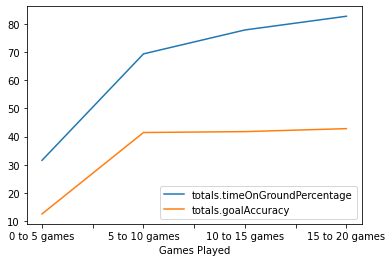

In [ ]:
df_avg_match_gamesPlayed = df_sortby_gamesPlayed[['Games Played','totals.timeOnGroundPercentage','totals.goalAccuracy']]
df_avg_match_gamesPlayed1 = pd.DataFrame.from_dict(df_avg_match_gamesPlayed.groupby(['Games Played']).mean()).reset_index()
df_avg_match_gamesPlayed1.plot('Games Played')